# Exercise

Noise in images can be reduced in several ways. One way is to give a pixel the mean value of 9 pixels, of itself and of its 8 nearest neighbor pixels. Program a function containing this algorithm (the code from the smoothing video does something else!) and use it to smoothen this stink bug image. Leave the boundary pixels identical to the original image. Again, download the image by right-clicking on the mouse.

Keep in mind that each pixel value must be a float between 0.0 and 1.0 or a uint8 in the range (0,255).


In [2]:
from os.path import join, abspath
import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib import rcParams
import numpy as np

%matplotlib inline

def read_jpg(filename):
    path = join(abspath(""), "data", filename)
    return img.imread(path)


def smooth_image(image):
    # fmt: off
    return np.array([[[
        _get_average_of_neighbors(image, row, col, channel)
        for channel in range(0, 3)]
        for col in range(0, image.shape[1])]
        for row in range(0, image.shape[0])]
    )
    # fmt: on


def _get_average_of_neighbors(image, row, col, channel):
    max_row_index = image.shape[0] - 1
    max_col_index = image.shape[1] - 1
    return (
        np.mean(image[row - 1 : row + 2, col - 1 : col + 2, channel])
        if 0 < row < max_row_index and 0 < col < max_col_index
        else image[row, col, channel]
    )


In [3]:
image = read_jpg("stinkbug.png")
smoothed = smooth_image(image)

print(f"Red value at position [5,499]: {smoothed[5,499,0]:.3}")
print(f"Green value at position [181, 260]: {smoothed[181, 260, 1]:.2}")
print(f"Grand mean pixel value: {np.mean(smoothed):.6}")

Red value at position [5,499]: 0.439
Green value at position [181, 260]: 0.33
Grand mean pixel value: 0.551117


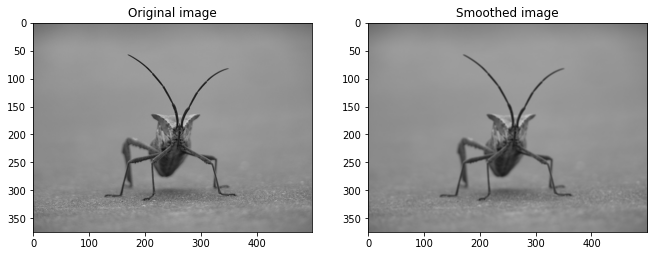

In [4]:
rcParams['figure.figsize'] = 11 ,8

fig, ax = plt.subplots(1,2)
ax[0].set_title("Original image")
ax[0].imshow(image)

ax[1].set_title("Smoothed image")
ax[1].imshow(smoothed)
plt.show()